In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Part A: EDA

In [ ]:
df = pd.read_csv("/kaggle/input/bostonhoustingmlnd/housing.csv")
target = "MEDV"

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


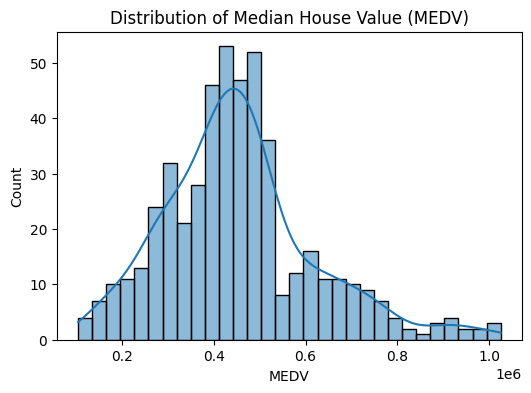

Skewness of target: 0.7750823014749909


In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df[target], bins=30, kde=True)
plt.title("Distribution of Median House Value (MEDV)")
plt.show()

print("Skewness of target:", df[target].skew())
#right skewed

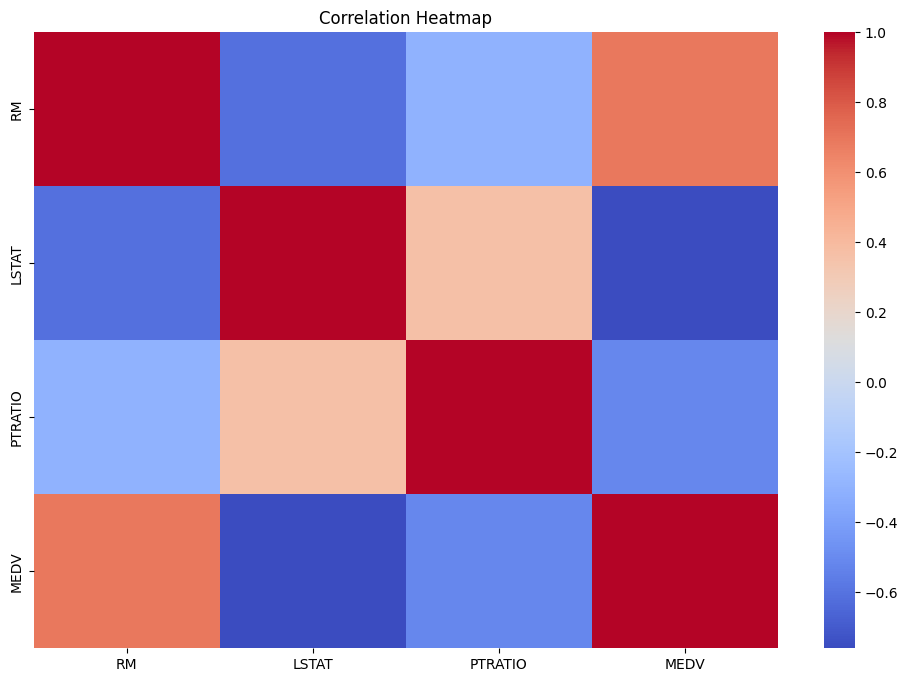

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
corr_with_target = df.corr()[target].sort_values(ascending=False)
print("\nCorrelation of features with MEDV:")
print(corr_with_target)


Correlation of features with MEDV:
MEDV       1.000000
RM         0.697209
PTRATIO   -0.519034
LSTAT     -0.760670
Name: MEDV, dtype: float64


Part B: Simple Linear Regression

In [8]:
X = df[["RM"]]
y = df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

intercept = simple_model.intercept_
slope = simple_model.coef_[0]
print(f"Simple Regression: y = {intercept:.3f} + {slope:.3f}*RM")

Simple Regression: y = -674475.357 + 181698.313*RM


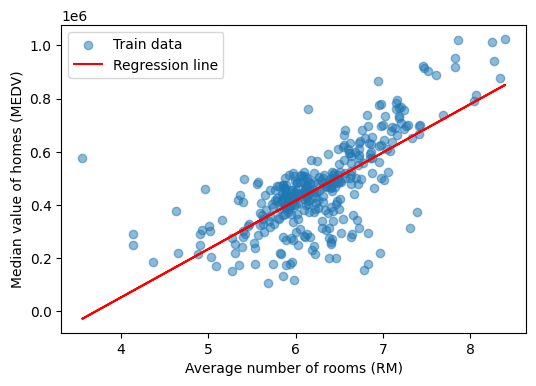

Interpretation: Each additional room (RM) increases MEDV by ~181698.31 units (in $1000s).


In [13]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, alpha=0.5, label="Train data")
plt.plot(X_train, simple_model.predict(X_train), color="red", label="Regression line")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Median value of homes (MEDV)")
plt.legend()
plt.show()
print(f"Interpretation: Each additional room (RM) increases MEDV by ~{slope:.2f} units (in $1000s).")

Part C: Multiple Linear Regression

In [14]:
features = ["RM", "LSTAT", "PTRATIO"]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

LinearRegression()

In [15]:
print("\nMultiple Regression Equation:")
print(f"y = {multi_model.intercept_:.3f}", end="")
for feat, coef in zip(features, multi_model.coef_):
    print(f" + ({coef:.3f})*{feat}", end="")
print()

print(f"Interpretation: For each additional room (RM), holding LSTAT & PTRATIO constant, "
      f"MEDV increases by ~{multi_model.coef_[0]:.2f} (in $1000s).")


Multiple Regression Equation:
y = 374190.791 + (91586.441)*RM + (-10200.418)*LSTAT + (-19182.771)*PTRATIO
Interpretation: For each additional room (RM), holding LSTAT & PTRATIO constant, MEDV increases by ~91586.44 (in $1000s).


In [ ]:
y_pred = multi_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


Model Performance:
R² Score: 0.6910
MSE: 7048219280.2177
RMSE: 83953.6734


In [ ]:
#r2 score measures fit/varience of the model
y_pred_simple = simple_model.predict(X_test[["RM"]])
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print("\n--- Comparison ---")
print("Simple Regression:")
print(f"R² = {r2_simple:.4f}, RMSE = {rmse_simple:.4f}")

print("\nMultiple Regression:")
print(f"R² = {r2:.4f}, RMSE = {rmse:.4f}")

if r2 > r2_simple:
    print("\nMultiple regression performs better because it explains more variance "
          "by using multiple predictors instead of just RM.")
else:
    print("\nSimple regression performed comparably or better — may indicate overfitting or irrelevant predictors.")


--- Comparison ---
Simple Regression:
R² = 0.3736, RMSE = 119536.7676

Multiple Regression:
R² = 0.6910, RMSE = 83953.6734

Multiple regression performs better because it explains more variance by using multiple predictors instead of just RM.
